In [2]:
import numpy as np
from BPmodule.BPGen  import PROBLEM2,PROBLEM3,PROBLEM4,PROBLEM5
from BPnumba.GeneticOperators import CreatePoblation,InstancePob,CreateHeuristicPob
from BPnumba.NumAG import createAG
import matplotlib.pyplot as plt
from numba.typed import List as NumbaList


In [15]:
P2A1 = PROBLEM2[0]
P2A2 = PROBLEM2[1]
P3A1 = PROBLEM3[0]
P3A2 = PROBLEM3[1]
P4A1 = PROBLEM4[0]
P4A2 = PROBLEM4[1]
P5A1 = PROBLEM5[0]
P5A2 = PROBLEM5[1]
contenedor =P4A1[0][0]
datos = P4A1[1]
idBoxes = np.arange(1,len(datos)+1,dtype=np.int64)
n= len(datos)
pop= 36
initial = CreateHeuristicPob(pop,datos)
maxItr=500
n,pop

(106, 36)

In [16]:
Pob = InstancePob(NumbaList(initial),datos,contenedor)

In [17]:
ag = createAG(0.85,0.1,0.75)

In [ ]:
ag.Train(maxItr,Pob,datos,contenedor)

In [ ]:
ag.BestInd.fi

0.992964

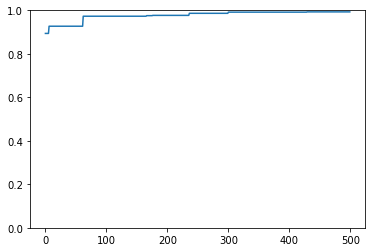

In [ ]:
plt.figure()
plt.plot(ag.bestfi)
plt.ylim(0,1)
plt.show()